Build Your Own Vocabulary Extractor
✅ Task
Given a list of documents (strings), build:

A frequency dictionary of tokens

A sorted vocabulary list

Remove tokens with frequency < min_freq

📘 Bonus
Plot a histogram of token frequency using matplotlib to observe Zipf's Law.

💡 Hints
Use collections.Counter

Tokenize with str.split() or basic whitespace for now

Top tokens: [('deep', 2), ('learning', 2), ('i', 1), ('love', 1), ('loves', 1), ('me', 1), ('neural', 1), ('networks', 1), ('are', 1), ('amazing', 1)]


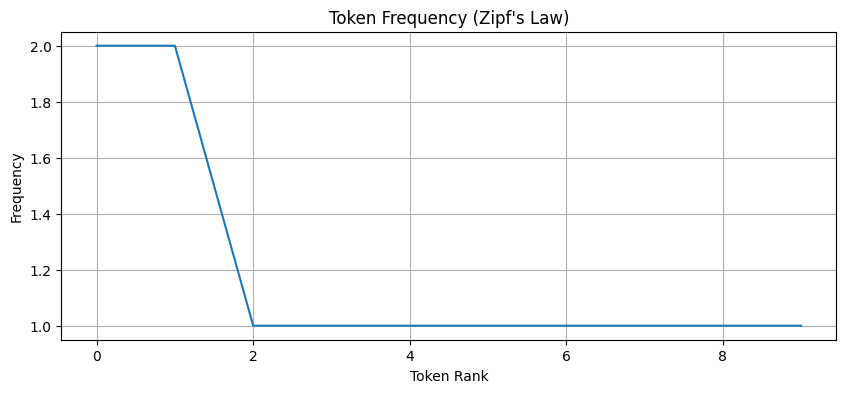

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import re
import unicodedata

corpus = [
    "I love deep learning.",
    "Deep learning loves me.",
    "Neural networks are amazing.",
]


# Optional: pip install contractions
contraction_map = {
    "i'm": "i am",
    "don't": "do not",
    "lovin'": "loving",
    # Add more as needed
}

def normalize_text(text):
    # Lowercase
    text = text.lower()
    
    # Expand contractions
    for k, v in contraction_map.items():
        text = text.replace(k, v)
    
    # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8")
    
    # Remove punctuation and symbols
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

def tokenize(text):
    return normalize_text(text).split()

# Flatten token list
tokens = []
for doc in corpus:
    tokens.extend(tokenize(doc))

vocab = Counter(tokens)

# Print top 10
print("Top tokens:", vocab.most_common(10))

# Plot frequency distribution
freqs = list(vocab.values())
plt.figure(figsize=(10, 4))
plt.plot(sorted(freqs, reverse=True))
plt.title("Token Frequency (Zipf's Law)")
plt.xlabel("Token Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
